# Simulating Random Probabilities with Python

## Question:

Suppose we are given a six-sided die where the *i*th side has probability $P_{i}$, of coming up on a roll (*i* = 0, 1, ..., 5). Let **P** = ($\frac{1}{6}$, $\frac{1}{12}$, $\frac{1}{3}$, $\frac{1}{12}$, $\frac{1}{24}$, $\frac{1}{24}$) be the vector with ith entry, $P_{i}$. Write code to simulate rolling the die 1000 times (store the sides you roll in a vector). Use the Python Matplotlib 'plt.hist' function to plot a histogram of of the number of times each side of the die is rolled (make sure you specify the bin edges as input to 'hist'). Also calculate the median and mean side that are rolled using the corresponding commands in Python ('np.mean' and 'np.median'). Here is some pseudo-code for the method.

1. Store the 'np.cumsum' of P in a vector, 'Psum'
2. Sreate a vector, 'sides', with length 10000 to store the sides chosen on each roll.
3. for i in range(0, 10000):
4. pick a random number, r, and find the index of the first entry in 'Psum' that is greater than or equal to r.

### Solution:

For this problem we're going to need two Python libraries: *numpy* for the mathematical operations and *matplotlib* to draw the histogram.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

We then define the probability distribution as given in the problem statement and a rollDie function that will simulate a die being rolled. We'll roll the die 1000 times and store the results. Using these results we can get the mean, median and plot the distribution in a histogram.

Mean: 3.414, Median: 3.0


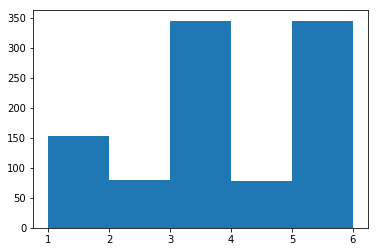

In [3]:
probability_distribution = getProbabilityDistribution(1/6, 1/12, 1/3, 1/12, 7/24, 1/24) # helper function implemented in last cell

rollDie = lambda: np.random.choice(np.arange(1, 7), p=probability_distribution)

rolls = np.array([rollDie() for _ in range(1000)])

sides, sides_frequencies = np.unique(rolls, return_counts=True)

mean, median = np.mean(rolls), np.median(rolls)

print(f'Mean: {mean}, Median: {median}')

side_distribution = plt.hist(rolls, bins=sides)

To find the first cumulative sum greater than a random nuber:

In [5]:
cumulative_probabilities = np.cumsum(probability_distribution)

random_values = np.random.random((1000,))

firstLargerThanRandom = np.array([np.nonzero(cumulative_probabilities >= random_value)[0][0] for random_value in random_values])

*Helper code:*

In [2]:
# seed the random number generator for reproducible results
np.random.seed(440)

def getProbabilityDistribution(*probabilities):
    '''Ensures that the probabilities being passed in add up to 1. Increments the highest value passed in 
    by the difference between the sum and 1.
    
    Args:
        *probabilities: A variable length tuple of probabilities
        
    Throws:
        TypeError: When values passed in are not numerical
        ValueError: When sum of values passed isn't almost equal to one
    
    Return:
        A list of probabilities that add up to one.
    '''
    for probability in probabilities:
        if type(probability) not in (float, int):
            raise TypeError(f'Expected probabilities to be float instead got {type(probability)}')
    
    TOLERANCE = 0.000001
    total = sum(probabilities)
    diff = 1 - total
    
    if total is 1:
        return list(probabilities)
            
    if abs(diff) > TOLERANCE:
        raise ValueError(f'Expected sum of probabilities to almost equal 1 instead sum is {sum(probabilities)}')
    
    largest = max(probabilities)
    lyst = list(probabilities)
    target = lyst.index(largest)
    
    if total > 1:
        lyst[target] -= diff
    else:
        lyst[target] += diff
    
    assert abs(sum(lyst) - 1) < TOLERANCE
    
    return lyst